In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

## Question 5

#### Function Definitions

In [2]:
def convert_to_gray_scale(rgb_img):
    
# Converts a coloured image to a gray scale image 
# Inputs:
#     rgb_img -----> Coloured image 
# Returns:
#     gray_img ----> Gray scale image 

    r, g, b = rgb_img[:,:,0], rgb_img[:,:,1], rgb_img[:,:,2]
    gray_img = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray_img

In [3]:
def apply_PCA(gray_img, random = False):
    
# Applies PCA to a given grayscale image and reconstructs the image by selecting:-  
# Action 1: 10%, 25%, 50% of the top PCs  
# Action 2: random 10% of PCs
#
# Inputs:
#     gray_img ------------------------------> Gray scale image 
#     random --------------------------------> flag to decide which of the two actions is to be performed.
# Returns:
#    reconst_images, reconst_images_error ---> if random = False (corresponds to action 1)
#    reconst_image, reconst_image_error -----> if random = True (corresponds to action 2)


    cov_mat = np.cov(gray_img.T)
    N = cov_mat.shape[0]
        
    if random == False:
        n_pc = list(map(lambda x: int(x*N), [0.10, 0.25, 0.50]))
        reconst_images = []
        reconst_images_error =[]
        
        for n in n_pc:  
            cov_mat = np.cov(gray_img.T)
            eig_val, eig_vec = np.linalg.eig(cov_mat)
            
            if np.all(np.diff(eig_val))<=0: 
                pass
            else:
                idx = eig_val.argsort()[::-1]
                eig_val = eig_val[idx]
                eig_vec = eig_vec[:,idx]
                
            eig_val = eig_val.real
            eig_vec = eig_vec.real
               
            img_transform = np.matmul(gray_img, eig_vec)
            cov_trans = np.matmul(eig_vec.T, np.matmul(cov_mat, eig_vec))

            img_red = img_transform[:,:n] 
            img_rev = np.matmul(img_red, eig_vec.T[:n,:])
            img_rev = img_rev.real
            reconst_images.append(img_rev.reshape(np.shape(gray_img)))

            img_red_error = img_transform[:,n:] 
            img_rev_error = np.matmul(img_red_error, eig_vec.T[n:,:])
            img_rev_error = img_rev_error.real
            reconst_images_error.append(img_rev_error.reshape(np.shape(gray_img)))
                        
        return reconst_images, reconst_images_error
    
    else:
        order = list(range(N))
        np.random.shuffle(order)
        cov_mat = np.cov(gray_img.T)
        eig_val, eig_vec = np.linalg.eig(cov_mat)
        
        if np.all(np.diff(eig_val))<=0: 
            pass
        else:
            idx = eig_val.argsort()[::-1]
            eig_val = eig_val[idx]
            eig_vec = eig_vec[:,idx]
            
        eig_val = eig_val.real
        eig_vec = eig_vec.real

        img_transform = np.matmul(gray_img, eig_vec)
        cov_trans = np.matmul(eig_vec.T, np.matmul(cov_mat, eig_vec))

        img_red = img_transform[:,order[:int(0.10*N)]] 
        img_rev = np.matmul(img_red, eig_vec.T[order[:int(0.10*N)],:])
        img_rev = img_rev.real
        reconst_image = img_rev.reshape(np.shape(gray_img))
        
        img_red_error = img_transform[:,order[int(0.10*N):]] 
        img_rev_error = np.matmul(img_red_error, eig_vec.T[order[int(0.10*N):],:])
        img_rev_error = img_rev_error.real
        reconst_image_error = img_rev_error.reshape(np.shape(gray_img))
        
        return reconst_image, reconst_image_error
    


#### Loading the image dataset

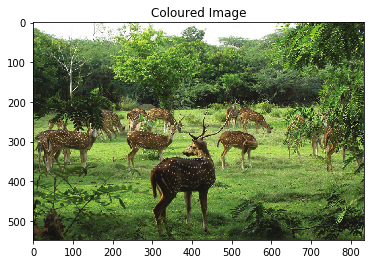

In [4]:
folder = 'Rectangular Images'
file = '7.jpg'
coloured_image = plt.imread(os.path.join(folder,file))
plt.imshow(coloured_image)
plt.title('Coloured Image')
plt.show()

#### Part (a)

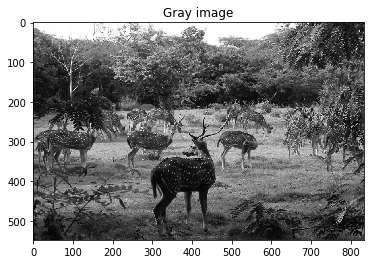

In [5]:
gray_image = convert_to_gray_scale(coloured_image)
plt.imshow(gray_image, cmap=plt.get_cmap('gray'))
plt.title('Gray image')
plt.show()

#### Part (b)

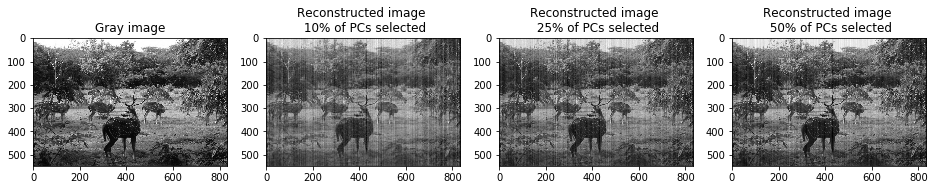

In [6]:
reconst_image, reconst_image_error = apply_PCA(gray_image)

pc_per = [10,25,50]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 20))
axes[0].imshow(gray_image, cmap=plt.get_cmap('gray'))
axes[0].set_title('Gray image')
for p in range(len(pc_per)):
    axes[p+1].imshow(reconst_image[p], cmap=plt.get_cmap('gray'))
    axes[p+1].set_title('Reconstructed image \n {}% of PCs selected'.format(pc_per[p]))

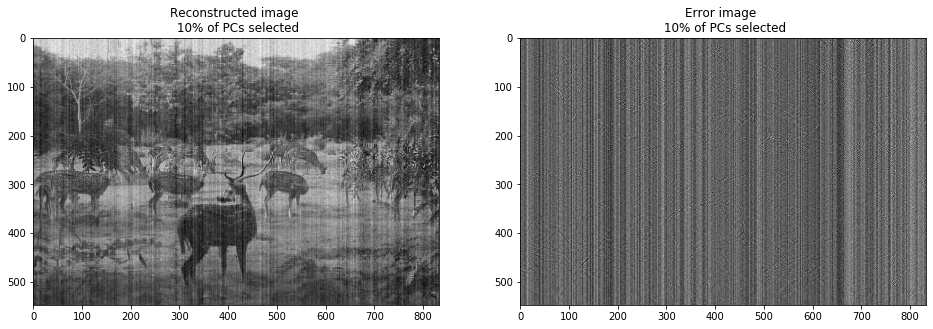

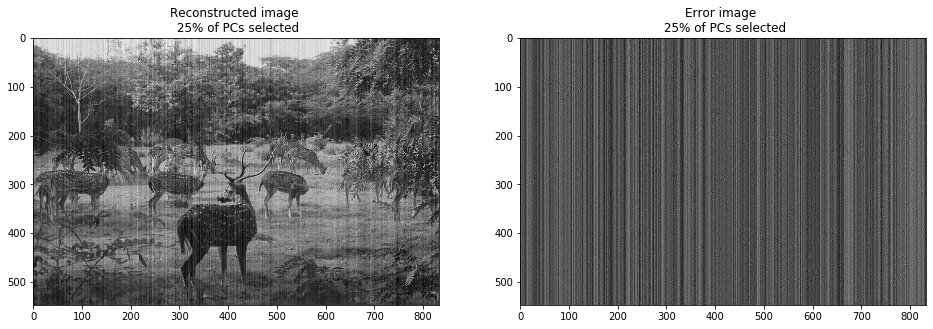

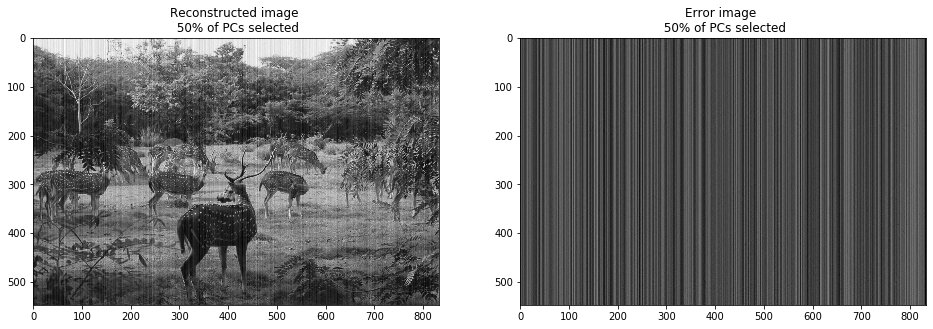

In [7]:
for p in range(len(pc_per)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 20))
    axes[0].imshow(reconst_image[p], cmap=plt.get_cmap('gray'))
    axes[0].set_title('Reconstructed image \n {}% of PCs selected'.format(pc_per[p]))
    axes[1].imshow(reconst_image_error[p], cmap=plt.get_cmap('gray'))
    axes[1].set_title('Error image \n {}% of PCs selected'.format(pc_per[p]))


In [8]:
table1 = []

headers = ["Image number"] + list(map(lambda x: "Frobenius norm \n ({}% of PCs selected)".format(x), pc_per))

table1.append([7, np.linalg.norm(reconst_image[0], 'fro')/np.linalg.norm(gray_image, 'fro'), np.linalg.norm(reconst_image[1], 'fro')/np.linalg.norm(gray_image, 'fro'), np.linalg.norm(reconst_image[2], 'fro')/np.linalg.norm(gray_image, 'fro')])

print(tabulate(table1, headers, tablefmt = 'fancy_grid'))

╒════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╕
│   Image number │          Frobenius norm  │          Frobenius norm  │          Frobenius norm  │
│                │    (10% of PCs selected) │    (25% of PCs selected) │    (50% of PCs selected) │
╞════════════════╪══════════════════════════╪══════════════════════════╪══════════════════════════╡
│              7 │                 0.982027 │                  0.99229 │                 0.996635 │
╘════════════════╧══════════════════════════╧══════════════════════════╧══════════════════════════╛


#### Part (c)

In [15]:
random_reconst = []
n_rand = 20
for i in range(20):
    random_reconst.append(apply_PCA(gray_image, random = True))

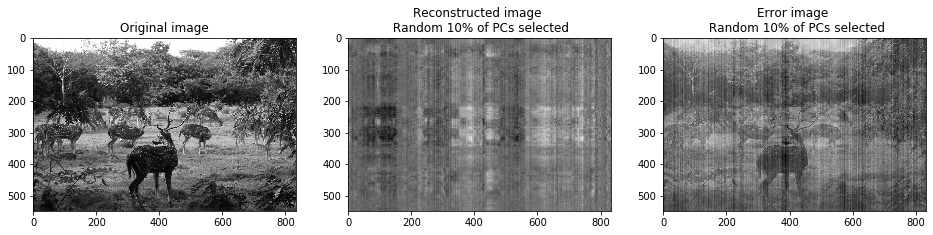

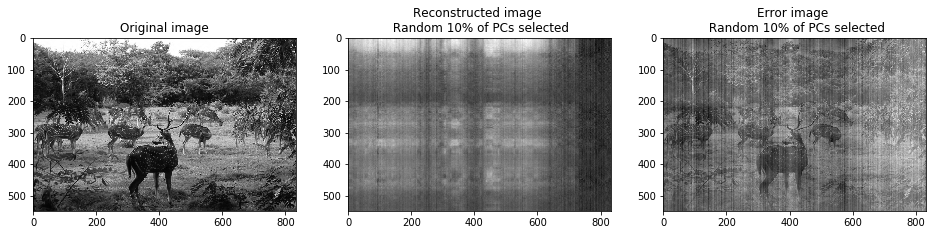

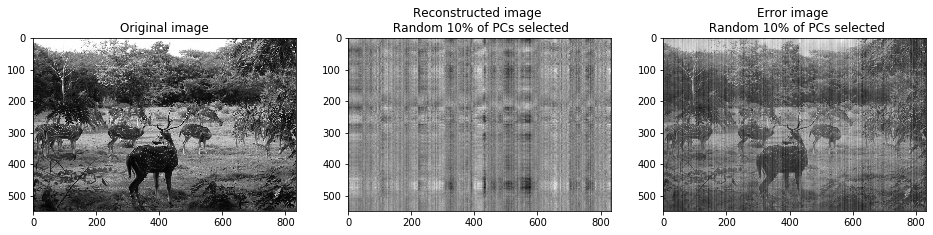

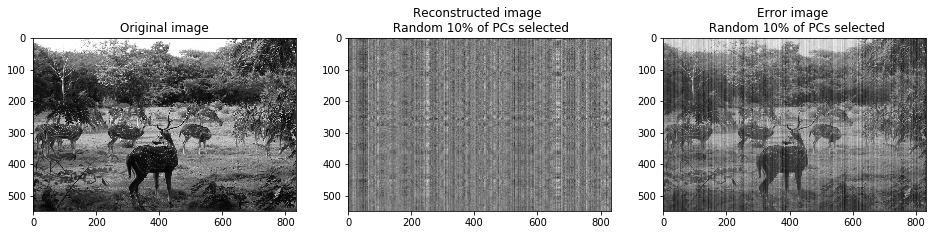

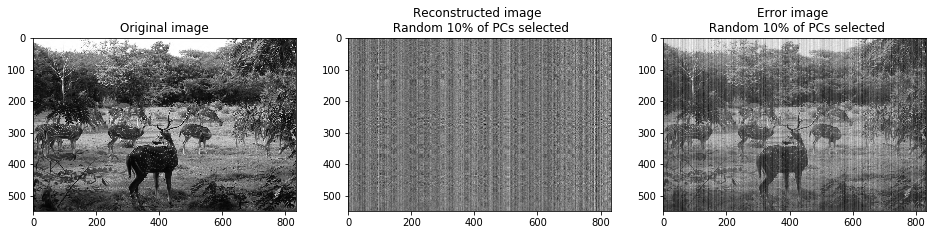

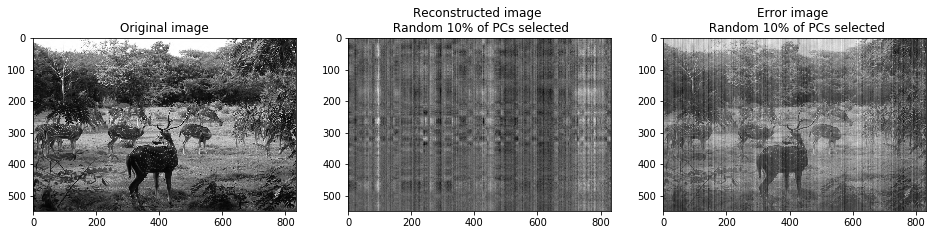

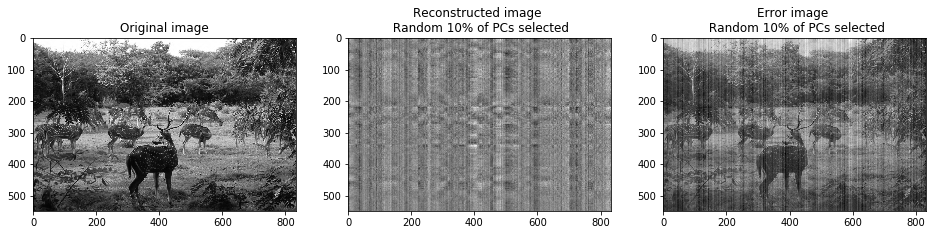

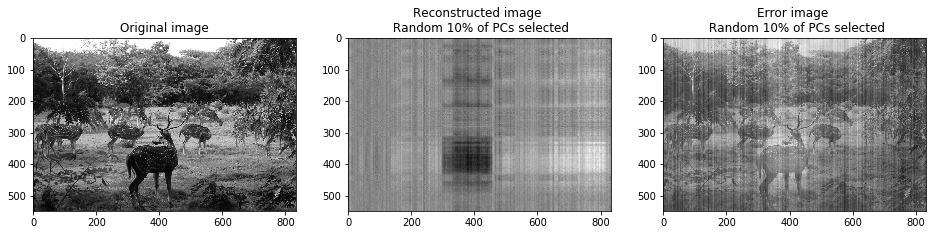

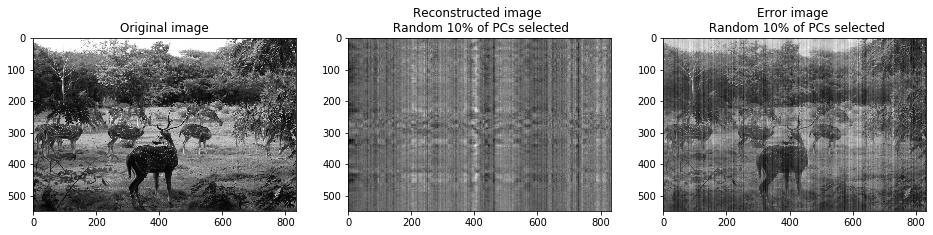

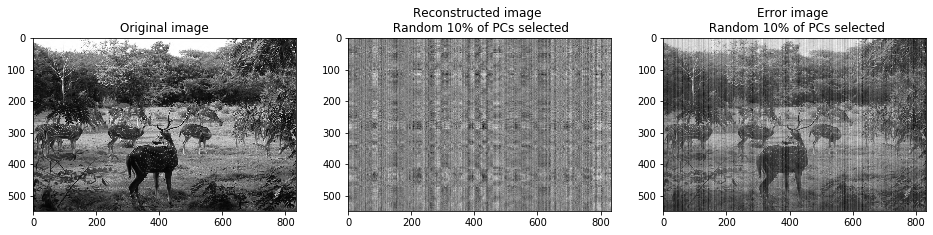

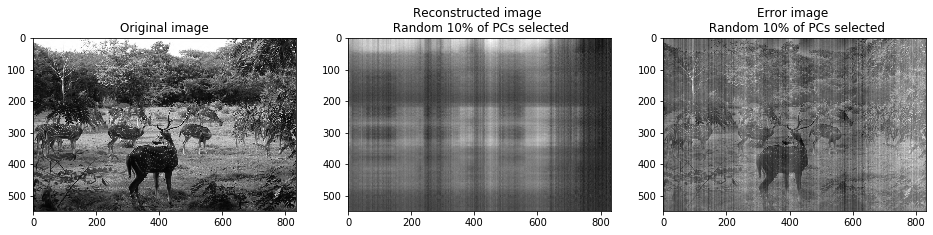

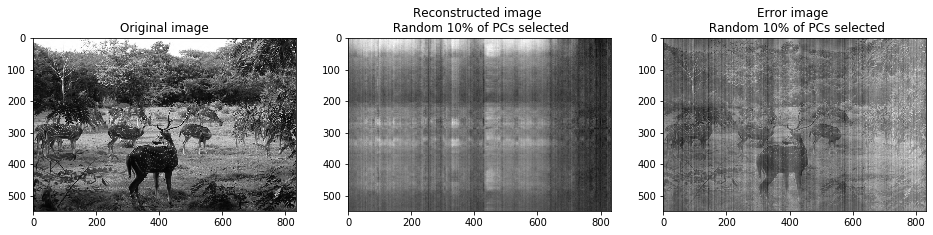

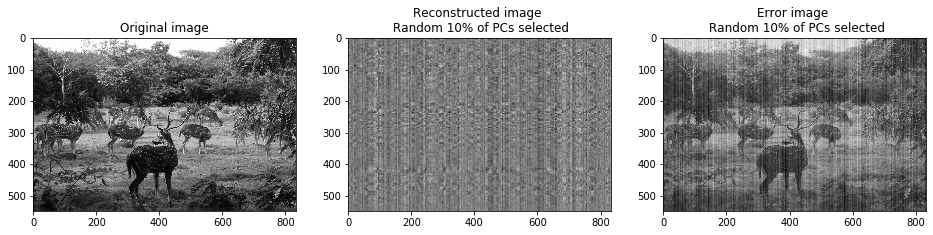

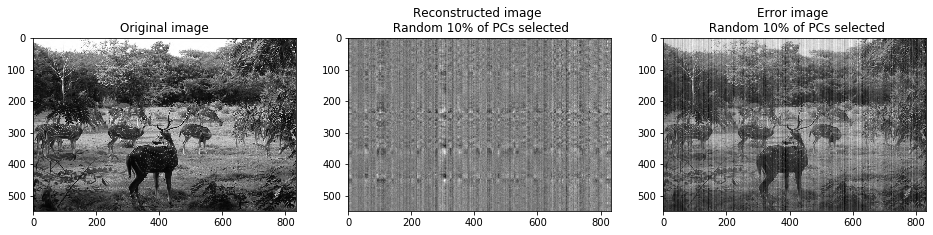

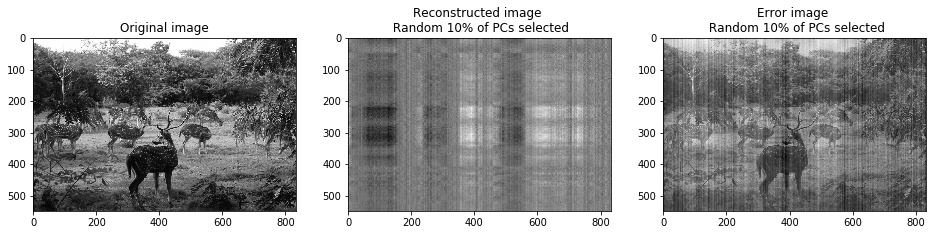

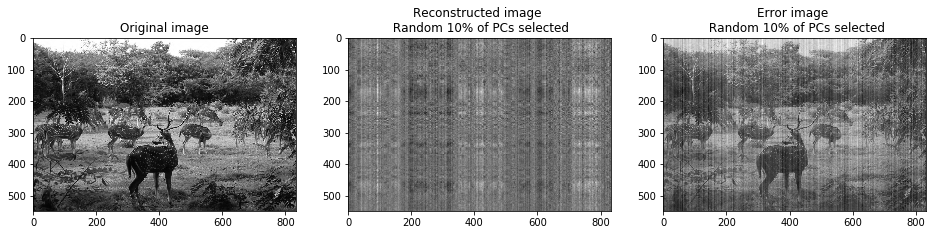

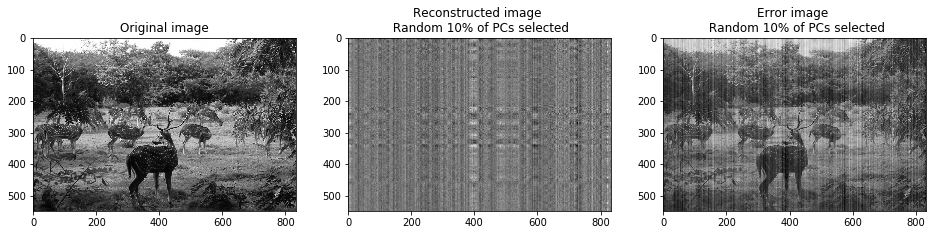

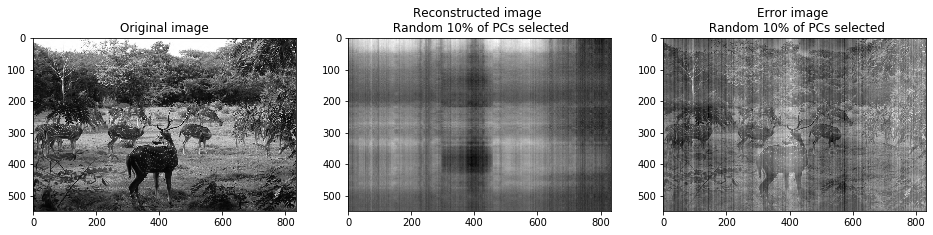

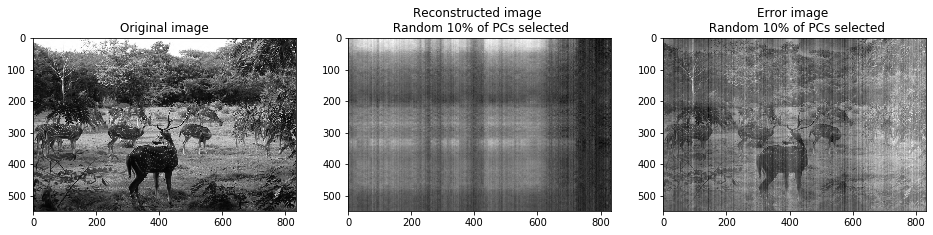

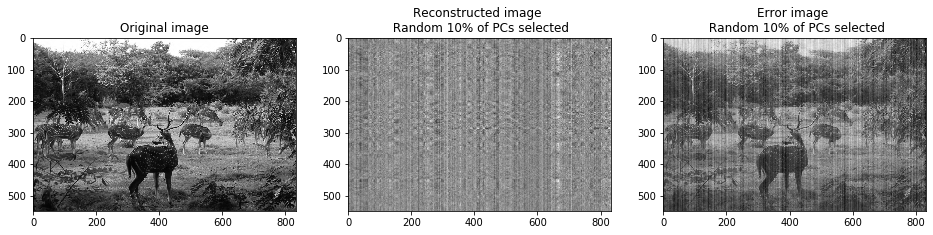

In [16]:
for i in range(n_rand):   
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 20))
    
    axes[0].imshow(gray_image, cmap=plt.get_cmap('gray'))
    axes[0].set_title('Original image')
    axes[1].imshow(random_reconst[i][0], cmap=plt.get_cmap('gray'))
    axes[1].set_title('Reconstructed image \n Random 10% of PCs selected')
    axes[2].imshow(random_reconst[i][1], cmap=plt.get_cmap('gray'))
    axes[2].set_title('Error image \n Random 10% of PCs selected')
    plt.show()


In [17]:
table2 = []

headers = ['Image number', 'Reconstructed image \n Random 10% of PCs selected'] 

for i in range(n_rand):
    table2.append([i+1, np.linalg.norm(random_reconst[i][0])/np.linalg.norm(gray_image, 'fro')])

print(tabulate(table2, headers, tablefmt = 'fancy_grid'))

╒════════════════╤═══════════════════════════════╕
│   Image number │          Reconstructed image  │
│                │    Random 10% of PCs selected │
╞════════════════╪═══════════════════════════════╡
│              1 │                     0.250847  │
├────────────────┼───────────────────────────────┤
│              2 │                     0.880932  │
├────────────────┼───────────────────────────────┤
│              3 │                     0.125304  │
├────────────────┼───────────────────────────────┤
│              4 │                     0.0955992 │
├────────────────┼───────────────────────────────┤
│              5 │                     0.0851936 │
├────────────────┼───────────────────────────────┤
│              6 │                     0.165428  │
├────────────────┼───────────────────────────────┤
│              7 │                     0.126575  │
├────────────────┼───────────────────────────────┤
│              8 │                     0.252768  │
├────────────────┼─────────────

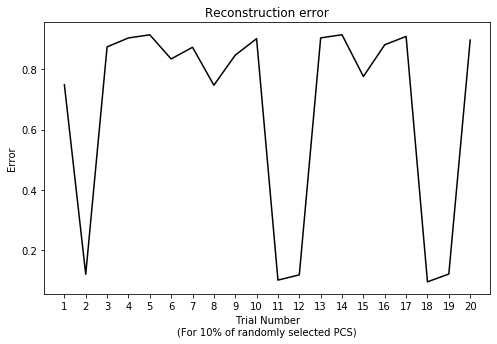

In [18]:
plt.figure(figsize=(8,5))
plt.plot(np.array(np.array(table2)[:,0].ravel()).astype(int), 1- np.array(table2)[:,1:].ravel(), 'k')
plt.title('Reconstruction error')
plt.xlabel('Trial Number\n(For 10% of randomly selected PCS)')
plt.xticks(np.array(np.array(table2)[:,0].ravel()).astype(int))
plt.ylabel('Error')
plt.show()

#### Part (d)

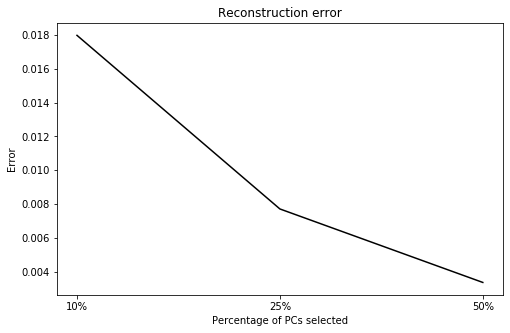

In [13]:
plt.figure(figsize=(8,5))
plt.plot(np.array(['10%','25%', '50%'], dtype = 'object'), 1- np.array(table1)[:,1:].ravel(), 'k')
plt.title('Reconstruction error')
plt.xlabel('Percentage of PCs selected')
plt.ylabel('Error')
plt.show()